In [5]:
import numpy as np
from pprint import pprint
from tqdm import tqdm

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score, hamming_loss, average_precision_score, coverage_error, \
label_ranking_average_precision_score, label_ranking_loss
from skmultilearn.problem_transform import LabelPowerset, BinaryRelevance, ClassifierChain

In [32]:
train_file = 'data/train_features.tsv'
valid_file = 'data/valid_features.tsv'
test_file = 'data/test_features.tsv'

In [283]:
train_file = 'data/train_features.csv'
valid_file = 'data/valid_features.csv'
test_file = 'data/test_features.csv'

In [284]:
label2id = {'OQ': 0, 'RQ': 1, 'FQ': 2, 'IR': 3, 'PF': 4, 'NF': 5, 'O': 6, 'PA': 7, 'GG': 8, 'FD': 9, 'CQ': 10, 'JK': 11}
id2label = {v: k for k, v in label2id.items()}
classes_num = len(label2id)

def load_data_and_labels(data_file):
    x = []
    y = []
    i = 0
    with open(data_file) as raw_data:
        for line in raw_data:
            i += 1
#             print(i)
            if line != '\n':
                line = line.strip()
                tokens = line.split('\t')
                labels = tokens[0].split('_')
                x.append([float(x) for x in tokens[1].split()])
                each_y = [0] * classes_num
                for label in labels:
                    each_y[label2id[label]] = 1
                y.append(each_y)
    return x, y

In [45]:
labelcheck=[]
exist=[]
i=0
x=[]
y=[]
with open(test_file) as raw_data:
    for line in raw_data:
        i += 1
#             print(i)
        if line != '\n':
            line = line.strip()
            tokens = line.split('\t')
            labels = tokens[0].split('_')
            x.append([float(x) for x in tokens[1].split()])
            each_y = [0] * classes_num
            for label in labels:
                each_y[label2id[label]] = 1
            y.append(each_y)
            if tokens[0] not in exist:
                exist.append(tokens[0])
                labelcheck.append((tokens[0],each_y))

In [86]:
tuple(labelcheck[0][1])

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [85]:
labelcheck

[('OQ', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('PA', [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 ('RQ', [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('GG', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 ('PF', [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 ('FD_OQ', [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 ('CQ_IR_PA', [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]),
 ('FD', [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 ('FD_RQ', [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 ('IR', [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('IR_PA', [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]),
 ('FD_PF', [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]),
 ('IR_OQ', [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('FD_IR', [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]),
 ('NF_OQ', [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 ('FD_FQ', [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 ('FD_PA', [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]),
 ('NF', [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 ('CQ', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 ('PA_PF', [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]),
 ('FQ', [0, 0, 1, 0, 0, 

In [272]:
labelc={tuple(labelcheck[i][1]) :labelcheck[i][0] for i in range(33)}

In [88]:
labelc

{(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'OQ',
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 'PA',
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'RQ',
 (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 'GG',
 (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 'PF',
 (1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_OQ',
 (0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0): 'CQ_IR_PA',
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD',
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_RQ',
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 'IR',
 (0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0): 'IR_PA',
 (0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0): 'FD_PF',
 (1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 'IR_OQ',
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_IR',
 (1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 'NF_OQ',
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_FQ',
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0): 'FD_PA',
 (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 'NF',
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 'CQ',
 (0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0): 'PA_PF',
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'FQ',
 (0, 0, 0, 0, 0, 1,

In [285]:
x_train, y_train = load_data_and_labels(train_file)
x_valid, y_valid = load_data_and_labels(valid_file)
x_test, y_test = load_data_and_labels(test_file)

y_train, y_valid, y_test = np.array(y_train), np.array(y_valid), np.array(y_test)


# stack train and valid for kcv
x_train_valid = x_train + x_valid
y_train_valid = np.vstack((y_train, y_valid))



In [286]:
print(np.array(x_train).shape, np.array(x_valid).shape, np.array(x_test).shape)

(970, 42) (807, 42) (795, 42)


In [288]:
def hamming_score(y_true, y_pred, toggle_output=False):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    https://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0])
        set_pred = set( np.where(y_pred[i])[1] )
        if toggle_output:
            print('set_true: {0}'.format([id2label[id] for id in set_true]), 'set_pred: {0}'.format([id2label[id] for id in set_pred]))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [289]:
def f1(y_true, y_pred):
    correct_preds, total_correct, total_preds = 0., 0., 0.
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0])
        set_pred = set( np.where(y_pred[i])[1] )
        
        correct_preds += len(set_true & set_pred)
        total_preds += len(set_pred)
        total_correct += len(set_true)

    p = correct_preds / total_preds if correct_preds > 0 else 0
    r = correct_preds / total_correct if correct_preds > 0 else 0
    f1 = 2 * p * r / (p + r) if correct_preds > 0 else 0
    return p, r, f1

In [290]:
from sklearn.ensemble import AdaBoostClassifier
from skmultilearn.problem_transform import LabelPowerset, ClassifierChain


In [292]:
max_f1base = 0
for n in tqdm([30,50,70,90,110,130,150]):    
    clf = ClassifierChain(classifier=AdaBoostClassifier(n_estimators=n,learning_rate=1), require_dense=[True, True])
    clf = clf.fit(x_train, y_train)
    predicted = clf.predict(np.array(x_valid))
    r,p,f1base=f1(np.array(y_valid), predicted.todense())

    if f1base > max_f1base:
        max_f1base = f1base
        best_param = n
        print( max_f1base)

 14%|███████████▎                                                                   | 1/7 [00:01<00:06,  1.08s/it]

0.7069672131147541


 29%|██████████████████████▌                                                        | 2/7 [00:02<00:06,  1.30s/it]

0.7319535588086825


 43%|█████████████████████████████████▊                                             | 3/7 [00:05<00:06,  1.67s/it]

0.7721582373560341


 57%|█████████████████████████████████████████████▏                                 | 4/7 [00:08<00:06,  2.17s/it]

0.7802197802197802


 71%|████████████████████████████████████████████████████████▍                      | 5/7 [00:12<00:05,  2.75s/it]

0.8017883755588674


 86%|███████████████████████████████████████████████████████████████████▋           | 6/7 [00:17<00:03,  3.32s/it]

0.817910447761194


100%|███████████████████████████████████████████████████████████████████████████████| 7/7 [00:23<00:00,  3.29s/it]

0.8273453093812375


In [293]:
n

150

In [ ]:
clf = ClassifierChain(classifier=AdaBoostClassifier(n_estimators=best_param,learning_rate=1.1), require_dense=[True, True])
clf = clf.fit(x_train, y_train)
predicted = clf.predict(np.array(x_test))
print(best_param)
print(hamming_score(np.array(y_test), predicted.todense(), False))
print(f1(np.array(y_test), predicted.todense()))

In [295]:
clf = ClassifierChain(classifier=AdaBoostClassifier(n_estimators=150,learning_rate=1), require_dense=[True, True])
clf = clf.fit(x_train, y_train)
predicted = clf.predict(np.array(x_test))
print(hamming_score(np.array(y_test), predicted.todense(), False))
print(f1(np.array(y_test), predicted.todense()))

0.7947589098532494
(0.8514225500526871, 0.7837051406401552, 0.8161616161616162)


In [296]:
predict=np.squeeze(np.asarray(predicted.todense()))


In [297]:
predict=predict.astype(int)
predict

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [298]:
predicted=[]
for i in range(len(predict)):
    try:
        predicted.append(labelc[tuple(list(predict[i]))])
    except KeyError:
        predicted.append('N')
        labelc[tuple(list(predict[i]))]='N'

In [299]:
predicted

['OQ',
 'PA',
 'RQ',
 'OQ',
 'PA',
 'PF',
 'JK',
 'OQ',
 'PA',
 'PA',
 'PF',
 'GG',
 'OQ',
 'PA',
 'PA',
 'OQ',
 'CQ_IR_PA',
 'FD',
 'FD',
 'OQ',
 'FD_FQ',
 'JK',
 'FD',
 'PA',
 'FD_PF',
 'PA',
 'OQ',
 'IR_PA',
 'FD_PA',
 'RQ',
 'OQ',
 'PA',
 'RQ',
 'OQ',
 'PA',
 'PF',
 'OQ',
 'PA',
 'FD',
 'JK',
 'OQ',
 'PA',
 'JK',
 'OQ',
 'CQ_IR_PA',
 'FD_FQ',
 'PA',
 'OQ',
 'PA',
 'PF',
 'OQ',
 'PA',
 'FD',
 'RQ',
 'NF',
 'CQ',
 'FD_PA',
 'PA',
 'OQ',
 'PA',
 'FD',
 'PA',
 'PA_PF',
 'PA',
 'OQ',
 'PA',
 'PF',
 'PA',
 'OQ',
 'PA',
 'FD',
 'PA',
 'OQ',
 'PA',
 'FQ',
 'PA',
 'OQ',
 'IR_PA',
 'FD',
 'FD',
 'PA',
 'OQ',
 'PA',
 'FD',
 'PA',
 'FD_NF',
 'PA',
 'FD_OQ',
 'JK',
 'FD',
 'FD',
 'FD_PA',
 'FD',
 'FD',
 'PA',
 'FD_NF',
 'FD_NF',
 'OQ',
 'PA',
 'PA',
 'OQ',
 'IR_PA',
 'FD',
 'PA',
 'JK',
 'IR',
 'PF',
 'GG',
 'OQ',
 'PA',
 'IR_OQ',
 'OQ',
 'JK',
 'PA',
 'OQ',
 'PA',
 'FQ',
 'PA',
 'OQ',
 'PA',
 'FD_FQ',
 'PA',
 'PF',
 'OQ',
 'CQ_PA',
 'PF',
 'OQ',
 'IR_PA',
 'PA',
 'OQ',
 'CQ_PA',
 'NF',
 'FD_PA

In [300]:
test=[labelc[tuple(y_test[i])] for i in range(len(y_test))]

In [301]:
test

['OQ',
 'PA',
 'RQ',
 'OQ',
 'PA',
 'GG',
 'PF',
 'OQ',
 'PA',
 'PA',
 'PF',
 'GG',
 'OQ',
 'PA',
 'PA',
 'FD_OQ',
 'CQ_IR_PA',
 'FD',
 'FD_RQ',
 'OQ',
 'PA',
 'IR',
 'FD',
 'IR_PA',
 'FD_PF',
 'PF',
 'IR_OQ',
 'CQ_IR_PA',
 'IR',
 'RQ',
 'OQ',
 'PA',
 'RQ',
 'OQ',
 'PA',
 'PF',
 'OQ',
 'PA',
 'FD_IR',
 'FD',
 'NF_OQ',
 'PA',
 'FD_IR',
 'OQ',
 'CQ_IR_PA',
 'FD_FQ',
 'PA',
 'NF_OQ',
 'PA',
 'PF',
 'OQ',
 'FD_PA',
 'PF',
 'FD_RQ',
 'NF',
 'CQ',
 'FD_IR',
 'PA_PF',
 'OQ',
 'PA',
 'FD',
 'IR_PA',
 'PF',
 'FD_PA',
 'OQ',
 'PA',
 'FD_PF',
 'FD',
 'OQ',
 'PA',
 'FD_FQ',
 'PA',
 'OQ',
 'PA',
 'FQ',
 'PA',
 'OQ',
 'IR',
 'FD',
 'FD',
 'PA',
 'OQ',
 'IR_PA',
 'FD',
 'PA',
 'FD_PF',
 'PA',
 'FD_OQ',
 'IR',
 'FD',
 'FD',
 'PA',
 'FD',
 'FD',
 'PA',
 'FD_NF',
 'IR_PA',
 'OQ',
 'PA',
 'PA',
 'OQ',
 'IR_PA',
 'FD',
 'PA',
 'FD',
 'PA',
 'PF',
 'GG',
 'OQ',
 'PA',
 'OQ',
 'OQ',
 'RQ',
 'PA',
 'OQ',
 'FD_PA',
 'FQ',
 'CQ_FQ',
 'OQ',
 'FD_PA',
 'FD_FQ',
 'PA',
 'PF',
 'OQ',
 'CQ_PA',
 'PF',
 'OQ',
 'IR_P

In [302]:
len(np.unique(y_test, axis=0))

33

In [303]:
labelc

{(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'OQ',
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 'PA',
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'RQ',
 (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 'GG',
 (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 'PF',
 (1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_OQ',
 (0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0): 'CQ_IR_PA',
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD',
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_RQ',
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 'IR',
 (0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0): 'IR_PA',
 (0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0): 'FD_PF',
 (1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 'IR_OQ',
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_IR',
 (1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 'NF_OQ',
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'FD_FQ',
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0): 'FD_PA',
 (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 'NF',
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 'CQ',
 (0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0): 'PA_PF',
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'FQ',
 (0, 0, 0, 0, 0, 1,

In [304]:
from sklearn.metrics import confusion_matrix

In [305]:
confusion=confusion_matrix(test, predicted, labels=list(labelc.values()))

In [306]:
confusion

array([[153,   1,   0, ...,   0,   0,   0],
       [  0, 168,   0, ...,   0,   0,   0],
       [  0,   2,  10, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [307]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay



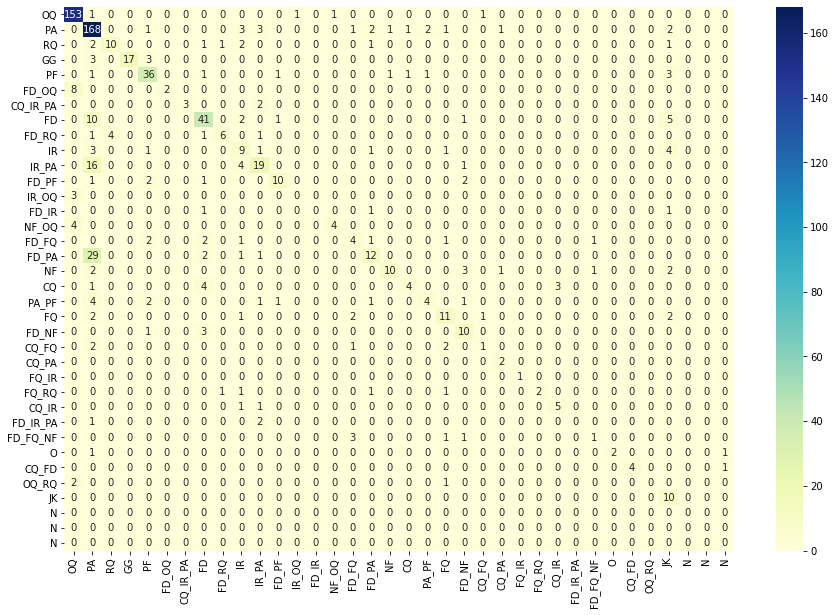

In [308]:
df_cm = pd.DataFrame(confusion, index = [i for i in list(labelc.values())],columns = [i for i in list(labelc.values())])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu",fmt="d")